In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2


In [ ]:
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.InteractiveSession()
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#dataset = keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Diagnostico/dados_derma/train')

#for data, labels in dataset:
  # print(data.shape)  # Imagem
  # print(data.dtype)  # Tipo: float32
  # print(labels.shape)  # Rótulo
 #  print(labels.dtype)  # Tipo: int32



In [ ]:
derma = '/content/drive/MyDrive/Diagnostico/train/'
x=[]
y=[]
cont = 1
for labels in os.listdir(derma):
    for file in os.listdir(os.path.join(derma, labels)):

        image_path = os.path.join(derma, labels,  file)

        image= cv2.imread( image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if cont % 1000 == 0:
            print(cont)
        cont += 1
        image = resize(image, (224, 224, 3), mode = 'constant', preserve_range = True)
        image=np.array(image)
        x.append(image)
        y.append(labels)


        #Normalização
        image /= 255




1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)
print(y_teste)

['Nail Fungus and other Nail Disease', 'Seborrheic Keratoses and other Benign Tumors', 'Psoriasis pictures Lichen Planus and related diseases', 'Nail Fungus and other Nail Disease', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Seborrheic Keratoses and other Benign Tumors', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Eczema Photos', 'Psoriasis pictures Lichen Planus and related diseases', 'Psoriasis pictures Lichen Planus and related diseases', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Nail Fungus and other Nail Disease', 'Seborrheic Keratoses and other Benign Tumors', 'Nail Fungus and other Nail Disease', 'Seborrheic Keratoses and other Benign Tumors', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Eczema Photos', 'Nail Fungus and other Nail Disease', 'Atopic Dermatitis Photos', 'Actinic Keratosis Basal Cell Car

In [ ]:
classes = np.unique (y_treino)
classes_num = len(classes)

print ('Outputs: ', classes_num)
print ('Classes: ', classes)

Outputs:  10
Classes:  ['Acne and Rosacea Photos'
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'
 'Atopic Dermatitis Photos' 'Eczema Photos'
 'Hair Loss Photos Alopecia and other Hair Diseases'
 'Herpes HPV and other STDs Photos' 'Nail Fungus and other Nail Disease'
 'Poison Ivy Photos and other Contact Dermatitis'
 'Psoriasis pictures Lichen Planus and related diseases'
 'Seborrheic Keratoses and other Benign Tumors']


['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Eczema Photos', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Psoriasis pictures Lichen Planus and related diseases', 'Psoriasis pictures Lichen Planus and related diseases', 'Acne and Rosacea Photos', 'Seborrheic Keratoses and other Benign Tumors', 'Nail Fungus and other Nail Disease', 'Atopic Dermatitis Photos', 'Eczema Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Seborrheic Keratoses and other Benign Tumors', 'Acne and Rosacea Photos', 'Poison Ivy Photos and other Contact Dermatitis', 'Nail Fungus and other Nail Disease', 'Eczema Photos', 'Acne and Rosacea Photos', 'Herpes HPV and other STDs Photos', 'Psoriasis pictures Lichen 

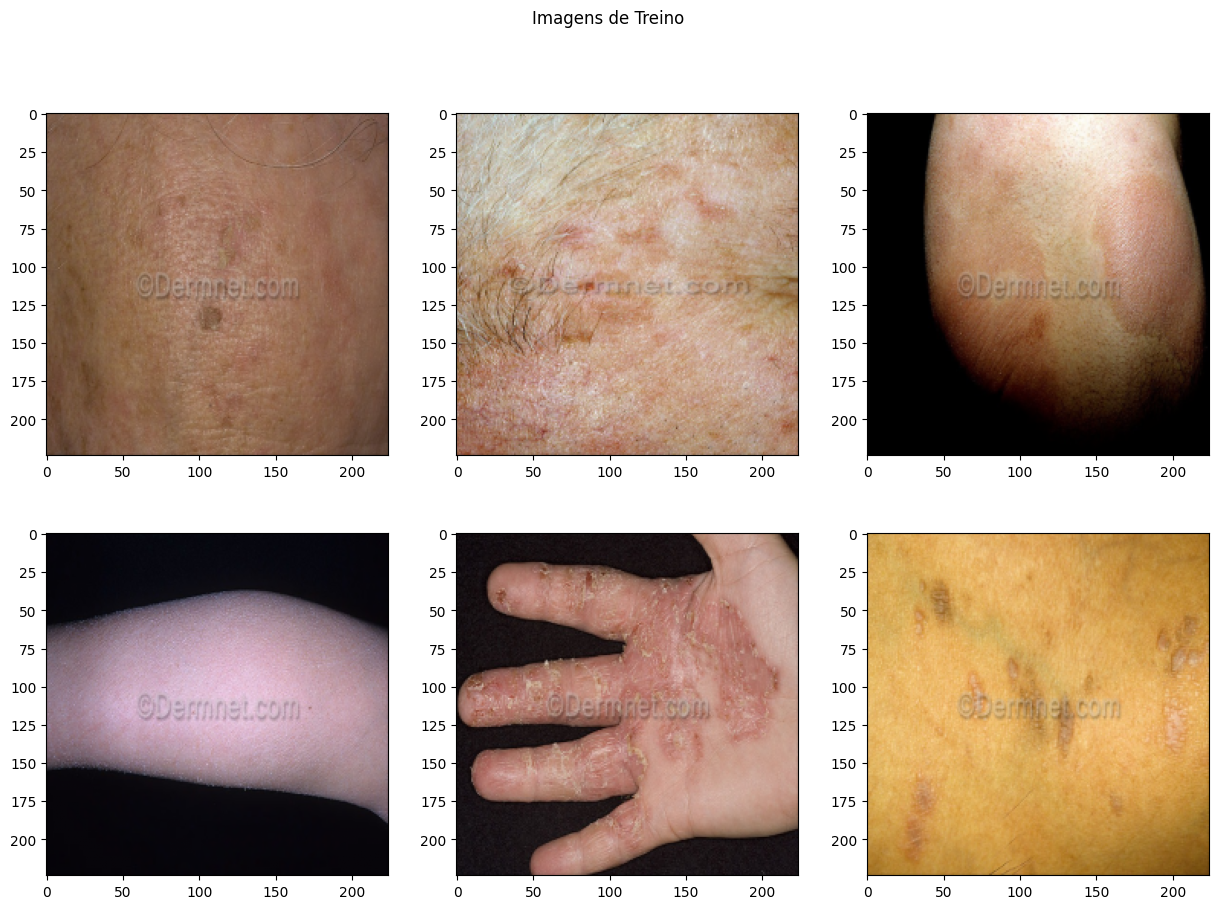

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Imagens de Treino')
columns = 3
rows = 2

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    print( y_treino)

    plt.imshow(x_treino[i])

plt.show()

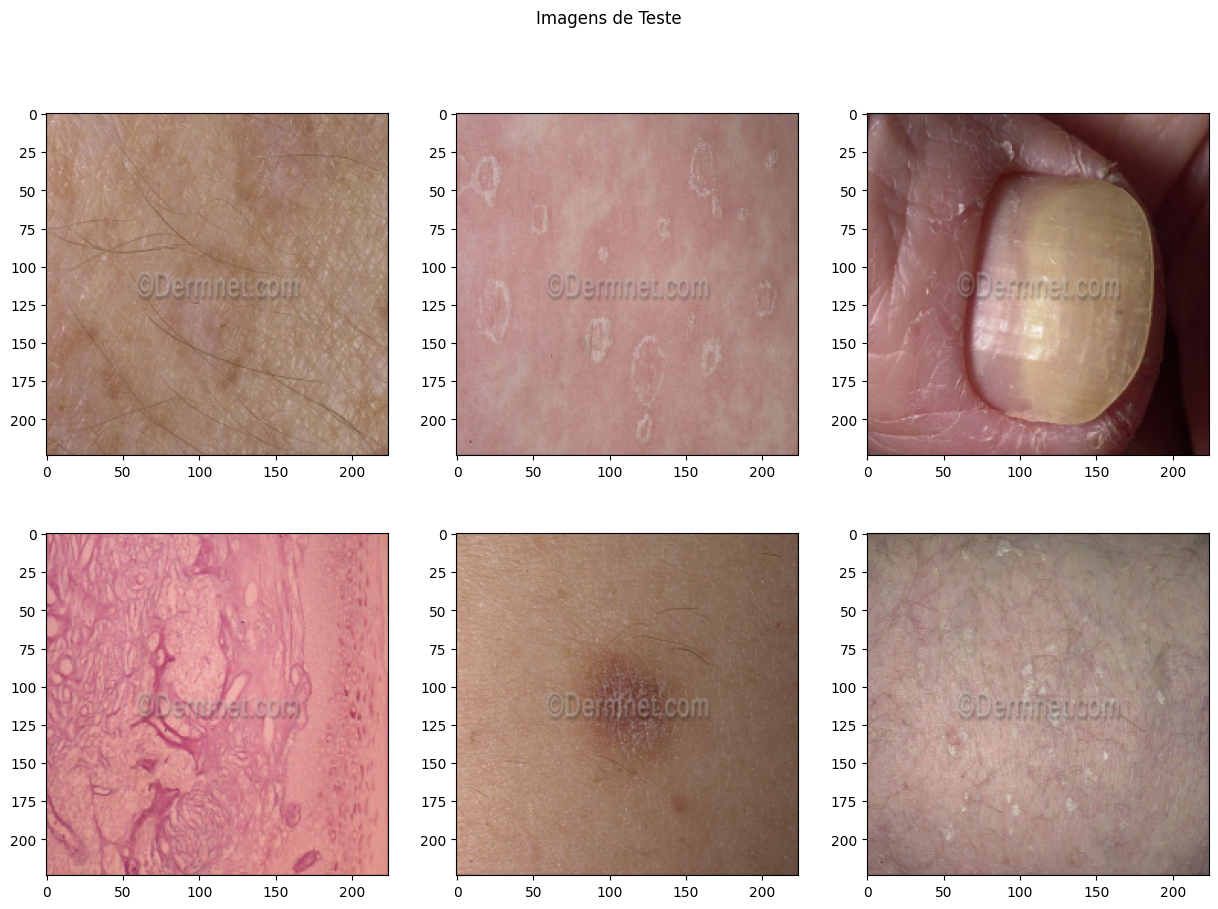

In [ ]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Imagens de Teste')
columns = 3
rows = 2

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)

    plt.imshow(x_teste[i])

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_treino)
y_test_encoded = label_encoder.transform(y_teste)

#aplica o one-hot
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
model = keras.models.Sequential(
        [
            keras.layers.InputLayer(input_shape=(224,224, 3)),

            keras.layers.Conv2D(32, kernel_size =(5,5), strides = (2,2),padding = 'same'),
            keras.layers.Dense(500, activation='relu', kernel_regularizer=l2(0.01), input_shape=(244, 244, 3)),
            keras.layers.MaxPooling2D(pool_size =(2,2)),
            keras.layers.Dropout(0.5),

            keras.layers.Conv2D(64, kernel_size = (3,3), strides = (2,2), padding = 'same'),
            keras.layers.Dense(500, activation='relu'),
            keras.layers.MaxPooling2D(pool_size =(2,2)),
            keras.layers.Dropout(0.5),

            keras.layers.Conv2D(128, kernel_size = (3,3), strides = (2,2), padding = 'same'),
            keras.layers.Dense(500, activation='relu'),
            keras.layers.MaxPooling2D(pool_size =(2,2)),



            keras.layers.Flatten(),
            keras.layers.Dropout(0.5),

            keras.layers.Dense(500, activation = 'relu'),
            keras.layers.Dropout(0.5),
            #Output layer/ Camada de Saída

        ])
model.add(Dense(10, activation='softmax'))

# Compile o modelo e ajuste conforme necessário
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 32)      2432      
                                                                 
 dense (Dense)               (None, 112, 112, 500)     16500     
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 56, 500)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 56, 56, 500)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        288064    
                                                                 
 dense_1 (Dense)             (None, 28, 28, 500)       32500     
                                                        

In [ ]:

x_test = np.array(x_teste)
x_train = np.array(x_treino)
y_test = np.array(y_test)
y_train = np.array(y_train)



In [ ]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)


(8518, 224, 224, 3) (8518, 10)
(2130, 224, 224, 3) (2130, 10)


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [ ]:

import os
os.environ["GPU_MEMORY_LIMIT"] = "16000"
model.save('my_model.h5')

model.load_weights('my_model.h5')

history = model.fit(x_train, y_train, epochs=500, batch_size = 50, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/500
171/171 [==============================] - 60s 271ms/step - loss: 2.3017 - accuracy: 0.1904 - val_loss: 2.1025 - val_accuracy: 0.2216
Epoch 2/500
171/171 [==============================] - 40s 235ms/step - loss: 2.0376 - accuracy: 0.2525 - val_loss: 1.9617 - val_accuracy: 0.2831
Epoch 3/500
171/171 [==============================] - 40s 232ms/step - loss: 1.9583 - accuracy: 0.2931 - val_loss: 1.9137 - val_accuracy: 0.3056
Epoch 4/500
171/171 [==============================] - 39s 231ms/step - loss: 1.9046 - accuracy: 0.3169 - val_loss: 1.9279 - val_accuracy: 0.3066
Epoch 5/500
171/171 [==============================] - 39s 230ms/step - loss: 1.8777 - accuracy: 0.3346 - val_loss: 1.8639 - val_accuracy: 0.3427
Epoch 6/500
171/171 [==============================] - 39s 230ms/step - loss: 1.8421 - accuracy: 0.3501 - val_loss: 1.8474 - val_accuracy: 0.3582
Epoch 7/500
171/171 [==============================] - 39s 230ms/step - loss: 1.8305 - accuracy: 0.3496 - val_loss: 1.8203 -

In [ ]:
print ('Perda e Acurácia:')
model.evaluate(x_test, y_test)

Perda e Acurácia:
67/67 [==============================] - 4s 54ms/step - loss: 2.1927 - accuracy: 0.5014


[2.192653179168701, 0.5014084577560425]

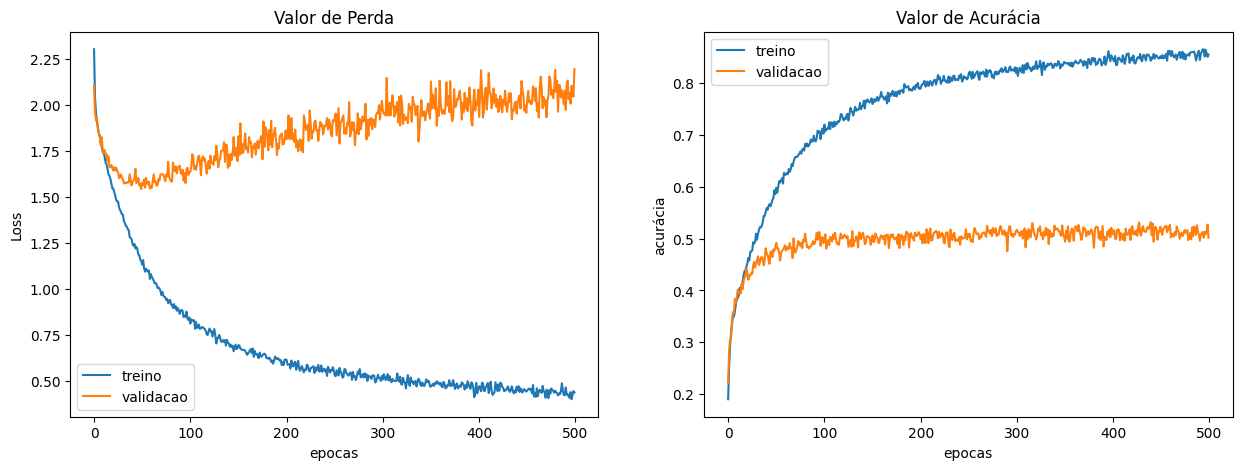

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Valor de Perda')
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")

plt.legend();
plt.subplot(1,2,2)
plt.title('Valor de Acurácia')
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")

plt.legend();

In [ ]:
from sklearn.metrics import classification_report

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(predicted_classes)
print(predicted_classes.shape, y_test.shape)

target_names = ["Class {}".format(i) for i in range(10)]
print(target_names)


67/67 [==============================] - 4s 53ms/step
[8 0 0 ... 9 0 1]
(2130,) (2130, 10)
['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']


In [ ]:
from sklearn.metrics import confusion_matrix
print(y_teste)


for i in range(len(y_teste)):
    if y_teste[i] == 'Acne and Rosacea Photos':
        y_teste[i] = 0
    if y_teste[i] == 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions':
        y_teste[i] = 1
    if y_teste[i] ==  'Atopic Dermatitis Photos':
        y_teste[i] = 2
    if y_teste[i] == 'Eczema Photos':
        y_teste[i] = 3
    if y_teste[i] == 'Hair Loss Photos Alopecia and other Hair Diseases':
        y_teste[i] = 4
    if y_teste[i] ==  'Herpes HPV and other STDs Photos':
        y_teste[i] = 5
    if y_teste[i] == 'Nail Fungus and other Nail Disease':
        y_teste[i] = 6
    if y_teste[i] == 'Poison Ivy Photos and other Contact Dermatitis':
        y_teste[i] = 7
    if y_teste[i] ==  'Psoriasis pictures Lichen Planus and related diseases':
        y_teste[i] = 8
    if y_teste[i] ==  'Seborrheic Keratoses and other Benign Tumors':
        y_teste[i] = 9
print(y_teste)



['Nail Fungus and other Nail Disease', 'Seborrheic Keratoses and other Benign Tumors', 'Psoriasis pictures Lichen Planus and related diseases', 'Nail Fungus and other Nail Disease', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Seborrheic Keratoses and other Benign Tumors', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Eczema Photos', 'Psoriasis pictures Lichen Planus and related diseases', 'Psoriasis pictures Lichen Planus and related diseases', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Nail Fungus and other Nail Disease', 'Seborrheic Keratoses and other Benign Tumors', 'Nail Fungus and other Nail Disease', 'Seborrheic Keratoses and other Benign Tumors', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Eczema Photos', 'Nail Fungus and other Nail Disease', 'Atopic Dermatitis Photos', 'Actinic Keratosis Basal Cell Car

67/67 [==============================] - 4s 53ms/step
[6, 9, 8, 6, 8, 9, 9, 4, 3, 8, 8, 1, 1, 6, 9, 6, 9, 4, 3, 6, 2, 1, 1, 8, 5, 8, 6, 0, 8, 8, 9, 9, 3, 6, 3, 6, 6, 6, 3, 3, 9, 8, 9, 6, 8, 8, 9, 9, 6, 0, 7, 0, 1, 1, 9, 9, 9, 5, 8, 0, 5, 6, 1, 3, 1, 1, 5, 6, 6, 3, 1, 2, 8, 9, 0, 0, 1, 8, 0, 8, 1, 3, 8, 8, 1, 6, 3, 0, 8, 3, 4, 5, 9, 3, 2, 6, 3, 3, 3, 0, 3, 6, 3, 7, 6, 1, 9, 8, 6, 2, 6, 8, 1, 3, 5, 1, 3, 3, 9, 7, 9, 8, 1, 9, 6, 9, 9, 1, 0, 2, 8, 3, 6, 1, 8, 2, 9, 4, 4, 3, 8, 1, 7, 0, 2, 6, 3, 6, 7, 1, 3, 3, 3, 1, 5, 0, 8, 3, 8, 4, 3, 0, 1, 9, 3, 3, 9, 9, 0, 6, 3, 0, 9, 0, 8, 7, 4, 5, 8, 6, 5, 0, 8, 8, 1, 6, 0, 8, 3, 8, 9, 0, 6, 6, 0, 5, 1, 9, 8, 1, 8, 9, 0, 1, 0, 2, 1, 9, 9, 8, 8, 1, 3, 3, 5, 0, 6, 7, 0, 6, 8, 0, 5, 4, 0, 1, 6, 2, 8, 9, 8, 0, 1, 4, 9, 9, 8, 9, 6, 3, 8, 8, 6, 2, 8, 6, 2, 1, 0, 6, 6, 1, 0, 6, 9, 3, 0, 1, 1, 2, 0, 6, 0, 2, 6, 7, 6, 1, 1, 6, 8, 8, 6, 2, 8, 9, 0, 8, 1, 4, 7, 6, 6, 1, 3, 6, 1, 4, 6, 1, 0, 1, 1, 1, 6, 1, 0, 0, 3, 8, 4, 6, 3, 5, 1, 1, 1, 1, 9, 1, 6, 8, 6, 9, 9, 

Text(0.5, 1.0, 'Matriz de Confusão normalizada')

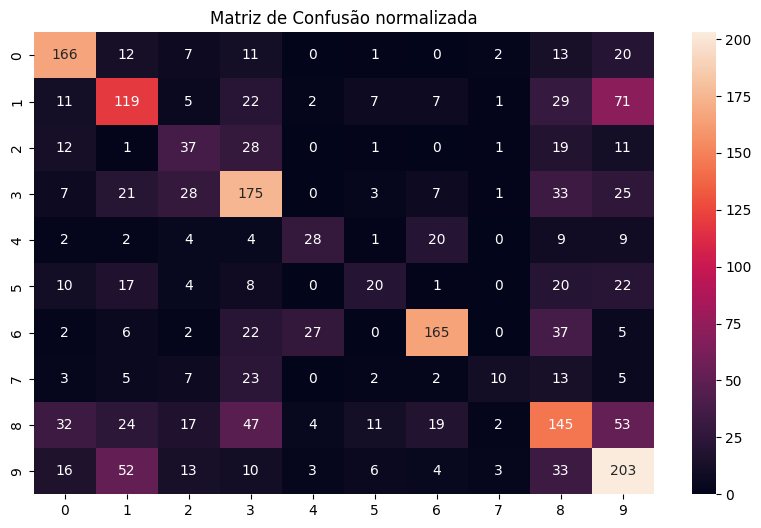

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(y_teste)
confusion_matrix_result=confusion_matrix(y_teste, y_pred)


import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_result, annot=True,fmt="d")
plt.title('Matriz de Confusão normalizada')